In [1]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR, LinearSVR
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.io as sio
from scipy.stats import pearsonr, spearmanr
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Load data
featurepath='/media/shuang/data/BrainAge/Brain_age_scripts/network_features/'
hc_fc_data = pd.read_csv(featurepath+'FC_HC_mean.csv', header=None)
hc_sc_data = pd.read_csv(featurepath+'SC_HC_mean.csv', header=None)
hc_msn_data = pd.read_csv(featurepath+'MSN_HC_mean.csv', header=None)
hc_age_data = pd.read_excel('/media/shuang/data/BrainAge/Brain_age_scripts/data/HC_age.xlsx')
hc_fc_data = np.array(hc_fc_data.iloc[2:, :])
hc_sc_data = np.array(hc_sc_data.iloc[2:, :])
hc_msn_data = np.array(hc_msn_data.iloc[2:, :])
hc_age_data = np.array(hc_age_data)

In [89]:
# Select FC features by using data from HC
data = hc_fc_data
# Normalized features
min_max_scaler = preprocessing.StandardScaler()
X = min_max_scaler.fit_transform(data)
y = hc_age_data[:, 0] # actural age
#estimator = SVR(kernel='linear', C=0.01)
estimator = RandomForestRegressor(n_estimators=50, random_state=42)
rfecv_fc = RFECV(estimator=estimator, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
rfecv_fc = rfecv_fc.fit(X, y)
scores = np.max(rfecv_fc.cv_results_["mean_test_score"])
print('Optimal number of features: {}'.format(rfecv_fc.n_features_))
select_ind_fc = list(np.where(rfecv_fc.support_ == True)[0]) # selected features
print("selected FC features:", select_ind_fc)
sio.savemat('/media/shuang/data/BrainAge/Brain_age_scripts/output/FeaturesS_FC_RF.mat', {'saved_fcidx': select_ind_fc})

Optimal number of features: 249
selected FC features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,

In [90]:
# Select SC features by using data from HC
data = hc_sc_data
# Normalized features
min_max_scaler = preprocessing.StandardScaler()
X = min_max_scaler.fit_transform(data)
y = hc_age_data[:, 0] # actural age
#estimator = SVR(kernel='linear', C=0.01)
estimator = RandomForestRegressor(n_estimators=50, random_state=42)
rfecv_sc = RFECV(estimator=estimator, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
rfecv_sc = rfecv_sc.fit(X, y)
scores = np.max(rfecv_sc.cv_results_["mean_test_score"])
print('Optimal number of features: {}'.format(rfecv_sc.n_features_))
select_ind_sc = list(np.where(rfecv_sc.support_ == True)[0]) # selected features
print("selected SC features:", select_ind_sc)
sio.savemat('/media/shuang/data/BrainAge/Brain_age_scripts/output/FeaturesS_SC_RF.mat', {'saved_scidx': select_ind_sc})

Optimal number of features: 12
selected SC features: [7, 19, 52, 78, 124, 128, 182, 194, 201, 227, 229, 239]


In [87]:
# Select MSN features by using data from HC
data = hc_msn_data
# Normalized features
min_max_scaler = preprocessing.StandardScaler()
X = min_max_scaler.fit_transform(data)
y = hc_age_data[:, 0] # actural age
#estimator = SVR(kernel='linear', C=0.01)
estimator = RandomForestRegressor(n_estimators=50, random_state=42)
rfecv_msn= RFECV(estimator=estimator, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
rfecv_msn = rfecv_msn.fit(X, y)
scores = np.max(rfecv_msn.cv_results_["mean_test_score"])
print('Optimal number of features: {}'.format(rfecv_msn.n_features_))
select_ind_msn = list(np.where(rfecv_msn.support_ == True)[0]) # selected features
print("selected SC features:", select_ind_msn)
sio.savemat('/media/shuang/data/BrainAge/Brain_age_scripts/output/FeaturesS_MSN_RF.mat', {'saved_msnidx': select_ind_msn})

Optimal number of features: 36
selected SC features: [1, 11, 13, 30, 46, 47, 50, 51, 63, 69, 86, 91, 104, 107, 154, 162, 165, 168, 173, 176, 188, 189, 190, 195, 197, 198, 203, 204, 205, 220, 225, 227, 243, 247, 249, 252]


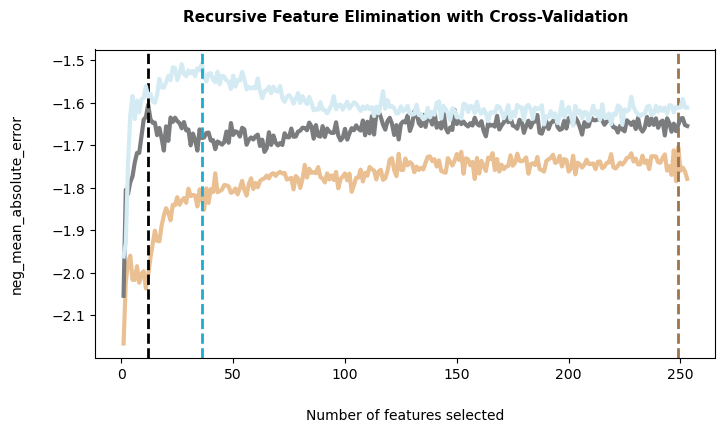

In [95]:
plt.figure(figsize=(8, 4))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=11, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=10, labelpad=20)
plt.ylabel('neg_mean_absolute_error', fontsize=10, labelpad=20)
plt.plot(range(1, len(rfecv_fc.cv_results_["mean_test_score"]) + 1), rfecv_fc.cv_results_["mean_test_score"], color='#eac092ff', linewidth=3)
plt.axvline(x = rfecv_fc.n_features_, color = '#9c734aff', linestyle = 'dashed', linewidth=2)
plt.plot(range(1, len(rfecv_sc.cv_results_["mean_test_score"]) + 1), rfecv_sc.cv_results_["mean_test_score"], color='#7a7c7eff', linewidth=3)
plt.axvline(x = rfecv_sc.n_features_, color = '#000000ff', linestyle = 'dashed', linewidth=2)
plt.plot(range(1, len(rfecv_msn.cv_results_["mean_test_score"]) + 1), rfecv_msn.cv_results_["mean_test_score"], color='#d4ebf4ff', linewidth=3)
plt.axvline(x = rfecv_msn.n_features_, color = '#1daccfff', linestyle = 'dashed', linewidth=2)
#plt.savefig('/media/shuang/data/BrainAge/Glasser360/figures/RFECV_RF.svg', dpi=1000)